### Ejercicio Clase 1: XOR con NNet

#### Alumno: Lucas Rivela

In [18]:
import math
import matplotlib.pyplot as plt
import random

In [14]:
# Defino inputs
input = [ [0,0], [0,1], [1,0], [1,1] ]
# Defino hiperparametros
n_epochs = 100
alfa = 0.5

In [10]:
# Defino funcion Sigmoid
def sigmoid(x):
    sig = 1 / (1 + math.exp(-x))
    return sig

In [3]:
# Inicializo variables con valores aleatorios
# Pesos y bias Neurona 1
w11_1 = random.uniform(0,1)
w12_1 = random.uniform(0,1)
b1_1 = random.uniform(0,1)
# Pesos y bias Neurona 2
w21_1 = random.uniform(0,1)
w22_1 = random.uniform(0,1)
b2_1 = random.uniform(0,1)
# Pesos y bias Neurona 3
w11_2 = random.uniform(0,1)
w12_2 = random.uniform(0,1)
b1_2 = random.uniform(0,1)


In [15]:
lista_MSE = []
for n in range(n_epochs):
    for Xi1, Xi2 in input:
        # Forward
        # Primer capa
        Zi1_1 = w11_1 * Xi1 + w12_1 * Xi2 + b1_1
        Zi2_1 = w21_1 * Xi1 + w22_1 * Xi2 + b2_1
        ai1_1 = sigmoid(Zi1_1)
        ai2_1 = sigmoid(Zi2_1)
        # Segunda capa
        Zi1_2 = w11_2 * ai1_1 + w12_2 * ai2_1 + b1_2
        # Salida
        y_hat = Zi1_2
        y_true = 0 if Xi1 == Xi2 else 1

        # Error
        err = y_true - y_hat
        
        # Backpropagation
        L_w11_2 = -2 * err * ai1_1
        L_w12_2 = -2 * err * ai2_1
        L_b1_2 = -2 * err
        
        L_w11_1 = -2 * err * w11_2 * sigmoid(Zi1_1) * (1 - sigmoid(Zi1_1)) * Xi1
        L_w12_1 = -2 * err * w11_2 * sigmoid(Zi1_1) * (1 - sigmoid(Zi1_1)) * Xi2
        L_b1_1 = -2 * err * w11_2 * sigmoid(Zi1_1) * (1 - sigmoid(Zi1_1))

        L_w21_1 = -2 * err * w12_2 * sigmoid(Zi2_1) * (1 - sigmoid(Zi2_1)) * Xi1
        L_w22_1 = -2 * err * w12_2 * sigmoid(Zi2_1) * (1 - sigmoid(Zi2_1)) * Xi2
        L_b2_1 = -2 * err * w12_2 * sigmoid(Zi2_1) * (1 - sigmoid(Zi2_1))
        # Actualizar pesos
        # Pesos y bias Neurona 1
        w11_1 = w11_1 - alfa * L_w11_1
        w12_1 = w12_1 - alfa * L_w12_1
        b1_1 = b1_1 - alfa * L_b1_1
        # Pesos y bias Neurona 2
        w21_1 = w21_1 - alfa * L_w21_1
        w22_1 = w22_1 - alfa * L_w22_1
        b2_1 = b2_1 - alfa * L_b2_1
        # Pesos y bias Neurona 3
        w11_2 = w11_2 - alfa * L_w11_2
        w12_2 = w12_2 - alfa * L_w12_2
        b1_2 = b1_2 - alfa * L_b1_2

        # Calcular MSE
        mse = (y_true - y_hat)**2
    mse = mse/4
    lista_MSE.append(mse)

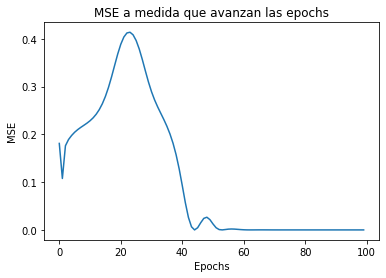

In [21]:
plt.title("MSE a medida que avanzan las epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.plot(range(n_epochs), lista_MSE)